In [1]:
# General libraries
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Deep learning libraries
import tensorflow.keras.backend as K
import tensorflow as tf

# Setting seeds for reproducibility
seed = 232
np.random.seed(seed)
tf.random.set_seed(seed)
from tensorflow.compat.v1 import ConfigProto,InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True 
config.gpu_options.per_process_gpu_memory_fraction = 0.9
session = InteractiveSession(config=config)

tf.compat.v1.disable_eager_execution()

In [2]:
from tensorflow.keras.models import load_model
model = load_model("C:/Users/Dell/Desktop/Hadrian_FYP/outputs/resnet")


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']         

 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 38, 38, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
          

 conv3_block2_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_out (Add)         (None, 19, 19, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_conv[0][0]']    
          

 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 21, 21, 128)  0          ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_block5_2_conv (Conv2D)   (None, 19, 19, 128)  147456      ['conv3_block5_2_pad[0][0]']     
                                                                                                  
 conv3_blo

 conv3_block8_preact_bn (BatchN  (None, 19, 19, 512)  2048       ['conv3_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 19, 19, 512)  0          ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 19, 19, 128)  65536       ['conv3_block8_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv3_block8_1_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block8_1_conv[0][0]']    
 ization) 

 conv4_block2_2_pad (ZeroPaddin  (None, 12, 12, 256)  0          ['conv4_block2_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 10, 10, 256)  589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block5_preact_relu (Acti  (None, 10, 10, 1024  0          ['conv4_block5_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 10, 10, 256)  262144      ['conv4_block5_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 10, 10, 1024  263168      ['conv4_block7_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block7_out (Add)         (None, 10, 10, 1024  0           ['conv4_block6_out[0][0]',       
                                )                                 'conv4_block7_3_conv[0][0]']    
          

                                                                                                  
 conv4_block10_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_pad (ZeroPaddi  (None, 12, 12, 256)  0          ['conv4_block10_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_blo

                                )                                                                 
                                                                                                  
 conv4_block12_out (Add)        (None, 10, 10, 1024  0           ['conv4_block11_out[0][0]',      
                                )                                 'conv4_block12_3_conv[0][0]']   
                                                                                                  
 conv4_block13_preact_bn (Batch  (None, 10, 10, 1024  4096       ['conv4_block12_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block13_preact_relu (Act  (None, 10, 10, 1024  0          ['conv4_block13_preact_bn[0][0]']
 ivation)                       )                                                                 
          

                                                                                                  
 conv4_block15_2_pad (ZeroPaddi  (None, 12, 12, 256)  0          ['conv4_block15_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 10, 10, 256)  589824      ['conv4_block15_2_pad[0][0]']    
                                                                                                  
 conv4_block15_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block15_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block15_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block15_2_bn[0][0]']     
 on)      

 Normalization)                 )                                                                 
                                                                                                  
 conv4_block18_preact_relu (Act  (None, 10, 10, 1024  0          ['conv4_block18_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, 10, 10, 256)  262144      ['conv4_block18_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block18_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block18_1_conv[0][0]']   
 lization)                                                                                        
          

 conv4_block20_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block20_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block20_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block20_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block20_out (Add)        (None, 10, 10, 1024  0           ['conv4_block19_out[0][0]',      
          

                                                                 ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block23_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block23_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block23_2_pad (ZeroPaddi  (None, 12, 12, 256)  0          ['conv4_block23_1_relu[0][0]']   
 ng2D)                                                                                            
          

 conv4_block25_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block25_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block25_out (Add)        (None, 10, 10, 1024  0           ['conv4_block24_out[0][0]',      
                                )                                 'conv4_block25_3_conv[0][0]']   
                                                                                                  
 conv4_block26_preact_bn (Batch  (None, 10, 10, 1024  4096       ['conv4_block25_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block26_preact_relu (Act  (None, 10, 10, 1024  0          ['conv4_block26_preact_bn[0][0]']
 ivation) 

 on)                                                                                              
                                                                                                  
 conv4_block28_2_pad (ZeroPaddi  (None, 12, 12, 256)  0          ['conv4_block28_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 10, 10, 256)  589824      ['conv4_block28_2_pad[0][0]']    
                                                                                                  
 conv4_block28_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block28_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block31_preact_bn (Batch  (None, 10, 10, 1024  4096       ['conv4_block30_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block31_preact_relu (Act  (None, 10, 10, 1024  0          ['conv4_block31_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 10, 10, 256)  262144      ['conv4_block31_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block31_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block31_1_conv[0][0]']   
 lization)

                                                                                                  
 conv4_block33_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block33_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block33_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_blo

 conv4_block36_1_conv (Conv2D)  (None, 10, 10, 256)  262144      ['conv4_block36_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block36_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block36_2_pad (ZeroPaddi  (None, 12, 12, 256)  0          ['conv4_block36_1_relu[0][0]']   
 ng2D)    

                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 5, 5, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 5, 5, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 5, 5, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalizat

In [4]:
tf.compat.v1.disable_eager_execution()
conv_layer = "post_relu"

from skimage import data, color, io, img_as_float
from skimage import filters
def get_heatmap(processed_image, class_idx):
    # we want the activations for the predicted label
    class_output = model.output[:, class_idx]
    
    # choose the last conv layer in your model
    last_conv_layer = model.get_layer(conv_layer)
    # get the gradients wrt to the last conv layer
    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
   # we pool the gradients over all the axes leaving out the channel dimension
    pooled_grads = K.mean(grads, axis=(0,1,2))
    print(pooled_grads)
    # Define a function that generates the values for the output and gradients
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    
    # get the values
    grads_values, conv_ouput_values = iterate([processed_image])
    
    # iterate over each feature map in your conv output and multiply
    # the gradient values with the conv output values. This gives an 
    # indication of "how important a feature is"
    nv = grads_values.shape[0]
    for i in range(nv):
        conv_ouput_values[:,:,i] *= grads_values[i]
    
    # create a heatmap
    heatmap = np.mean(conv_ouput_values, axis=-1)
    
    # remove negative values
    heatmap = np.maximum(heatmap, 0)
    
    # normalize
    heatmap /= heatmap.max()
    
    return heatmap

In [ ]:
tf.compat.v1.disable_eager_execution()
conv_layer = "post_relu"

from skimage import data, color, io, img_as_float
from skimage import filters
def get_heatmap(processed_image, class_idx):
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer(conv_layer)
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0,1,2))
    print(pooled_grads)
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    grads_values, conv_ouput_values = iterate([processed_image])
    nv = grads_values.shape[0]
    for i in range(nv):
        conv_ouput_values[:,:,i] *= grads_values[i]
    heatmap = np.mean(conv_ouput_values, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= heatmap.max()
    
    return heatmap

In [5]:
def pre(sample_image,model):
    sample_image = cv2.resize(sample_image, (150,150))
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    sample_image = sample_image.astype(np.float32)/255.
    sample_label = 1
    sample_image_processed = np.expand_dims(sample_image, axis=0)
    pred_label =[]
    pred_label = model.predict(sample_image_processed)
    pred_label = list(pred_label[0]).index(max(pred_label[0]))
    return pred_label,sample_image,sample_image_processed

In [6]:
def heatm(pred_label,sample_image,sample_image_processed):
    # get the heatmap for class activation map(CAM)
    heatmap = get_heatmap(sample_image_processed, pred_label)
    heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
    heatmap = heatmap *255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_RAINBOW)
    #superimpose the heatmap on the image    

    sample_image_hsv = color.rgb2hsv(sample_image)
    heatmap = color.rgb2hsv(heatmap)

    alpha=.9
    sample_image_hsv[..., 0] = heatmap[..., 0]
    sample_image_hsv[..., 1] = heatmap[..., 1] * alpha

    img_masked = color.hsv2rgb(sample_image_hsv)
    return img_masked

In [7]:
from glob import glob #retriving an array of files in directories
path_test = "C:\\Users\\Dell\\Desktop\\Hadrian_FYP\\Code\\proc_input\\covid_data\\test\\"
dis = ["NORMAL","PNEUMONIA","COVID"]
num = 5

C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Tensor("Mean:0", shape=(2048,), dtype=float32)
Tensor("Mean_1:0", shape=(2048,), dtype=float32)
Tensor("Mean_2:0", shape=(2048,), dtype=float32)
Tensor("Mean_3:0", shape=(2048,), dtype=float32)
Tensor("Mean_4:0", shape=(2048,), dtype=float32)


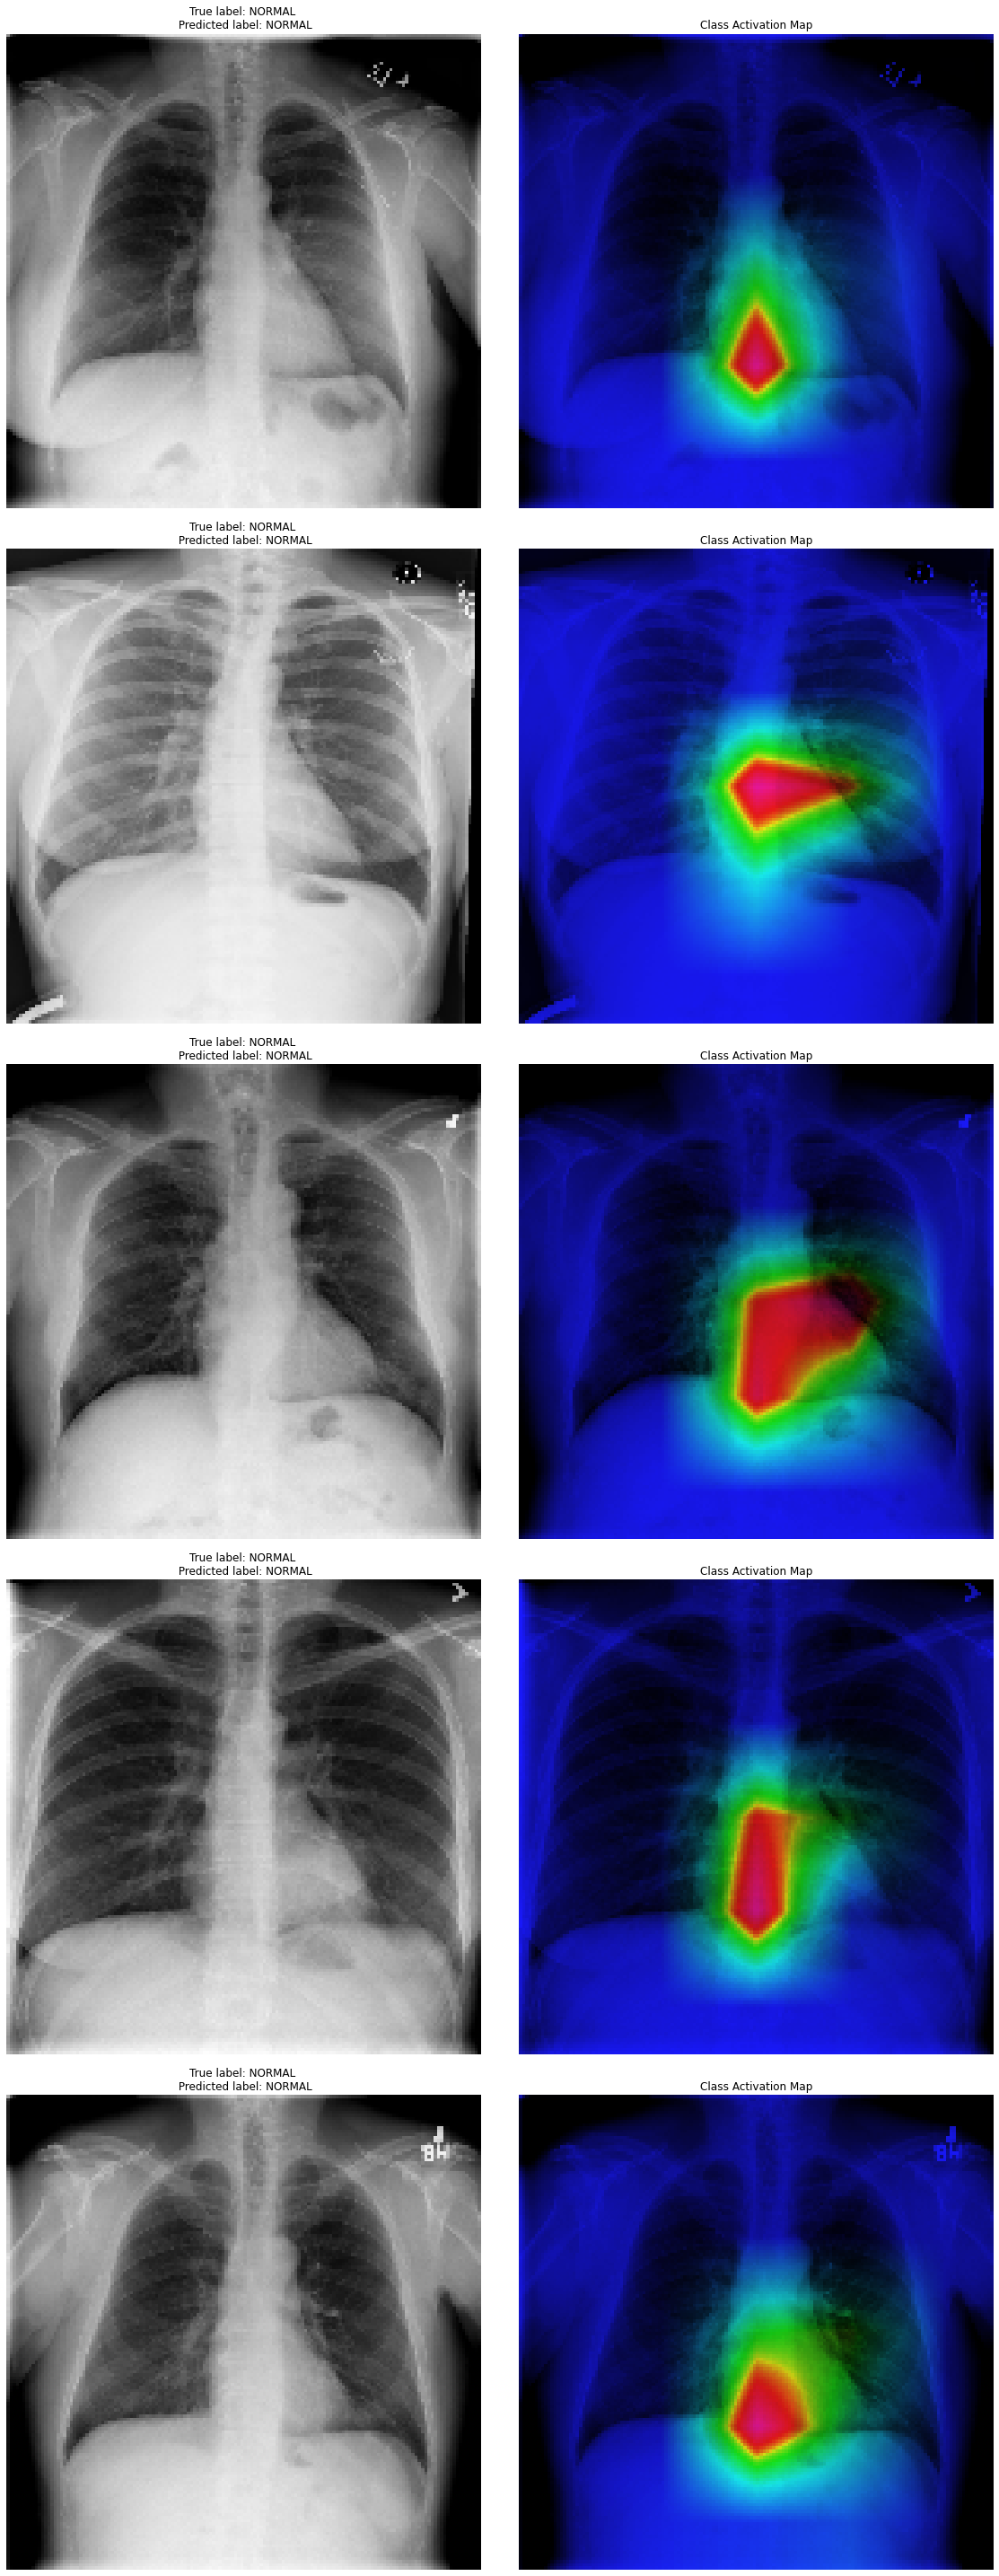

In [8]:
#NORMAL HEATMAP
img = glob(path_test+dis[0]+"/*.jpg")
random.shuffle(img)
count = 0
f,ax = plt.subplots(num,2, figsize=(16,40))
ax = ax.ravel()
plt.tight_layout()
i = 0
for sample_image in img:
    sample_image = plt.imread(sample_image)
    pred_label,sample_image1,sample_image_processed = pre(sample_image,model)
    img_masked = heatm(pred_label,sample_image1,sample_image_processed)
    if(dis[0] == dis[pred_label]):
        ax[i].imshow(sample_image1)
        ax[i].set_title(f"True label: {dis[0]} \n Predicted label: {dis[pred_label]}")
        ax[i].axis('off')
        i+=1
        ax[i].imshow(img_masked)
        ax[i].set_title("Class Activation Map")
        ax[i].axis('off')
        i+=1
        count += 1
        if(count == num):
            break  
plt.show()

Tensor("Mean_5:0", shape=(2048,), dtype=float32)
Tensor("Mean_6:0", shape=(2048,), dtype=float32)
Tensor("Mean_7:0", shape=(2048,), dtype=float32)
Tensor("Mean_8:0", shape=(2048,), dtype=float32)
Tensor("Mean_9:0", shape=(2048,), dtype=float32)
Tensor("Mean_10:0", shape=(2048,), dtype=float32)
Tensor("Mean_11:0", shape=(2048,), dtype=float32)


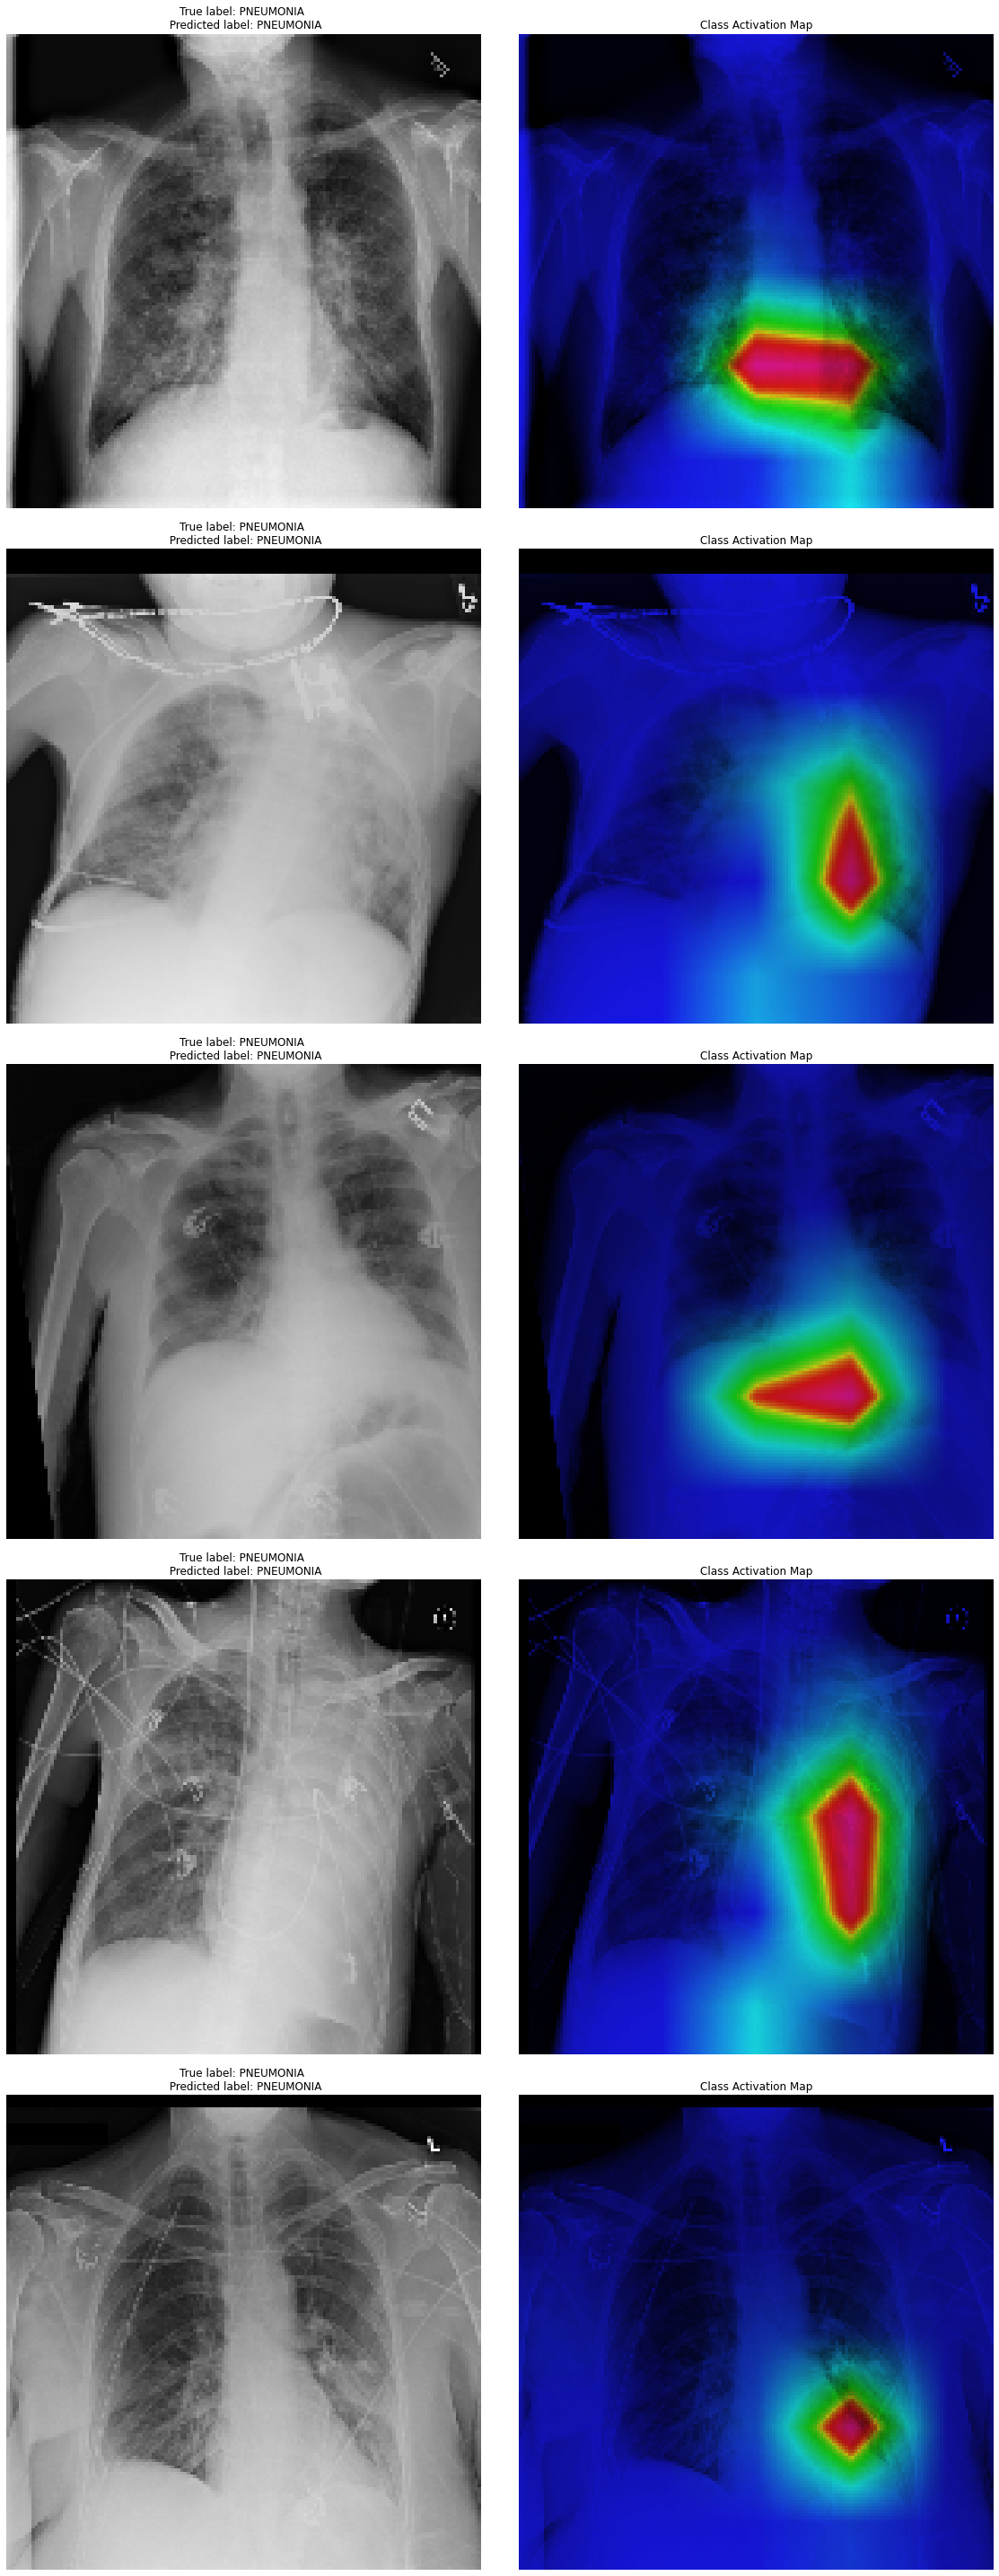

In [9]:
#PNEUMONIA HEATMAP
img = glob(path_test+dis[1]+"/*.jpg")
random.shuffle(img)
count = 0
f,ax = plt.subplots(num,2, figsize=(16,40))
ax = ax.ravel()
plt.tight_layout()
i = 0
for sample_image in img:
    sample_image = plt.imread(sample_image)
    pred_label,sample_image1,sample_image_processed = pre(sample_image,model)
    img_masked = heatm(pred_label,sample_image1,sample_image_processed)
    if(dis[1] == dis[pred_label]):
        ax[i].imshow(sample_image1)
        ax[i].set_title(f"True label: {dis[1]} \n Predicted label: {dis[pred_label]}")
        ax[i].axis('off')
        i+=1
        ax[i].imshow(img_masked)
        ax[i].set_title("Class Activation Map")
        ax[i].axis('off')
        i+=1
        count += 1
        if(count == num):
            break  
plt.show()

Tensor("Mean_12:0", shape=(2048,), dtype=float32)
Tensor("Mean_13:0", shape=(2048,), dtype=float32)
Tensor("Mean_14:0", shape=(2048,), dtype=float32)
Tensor("Mean_15:0", shape=(2048,), dtype=float32)
Tensor("Mean_16:0", shape=(2048,), dtype=float32)


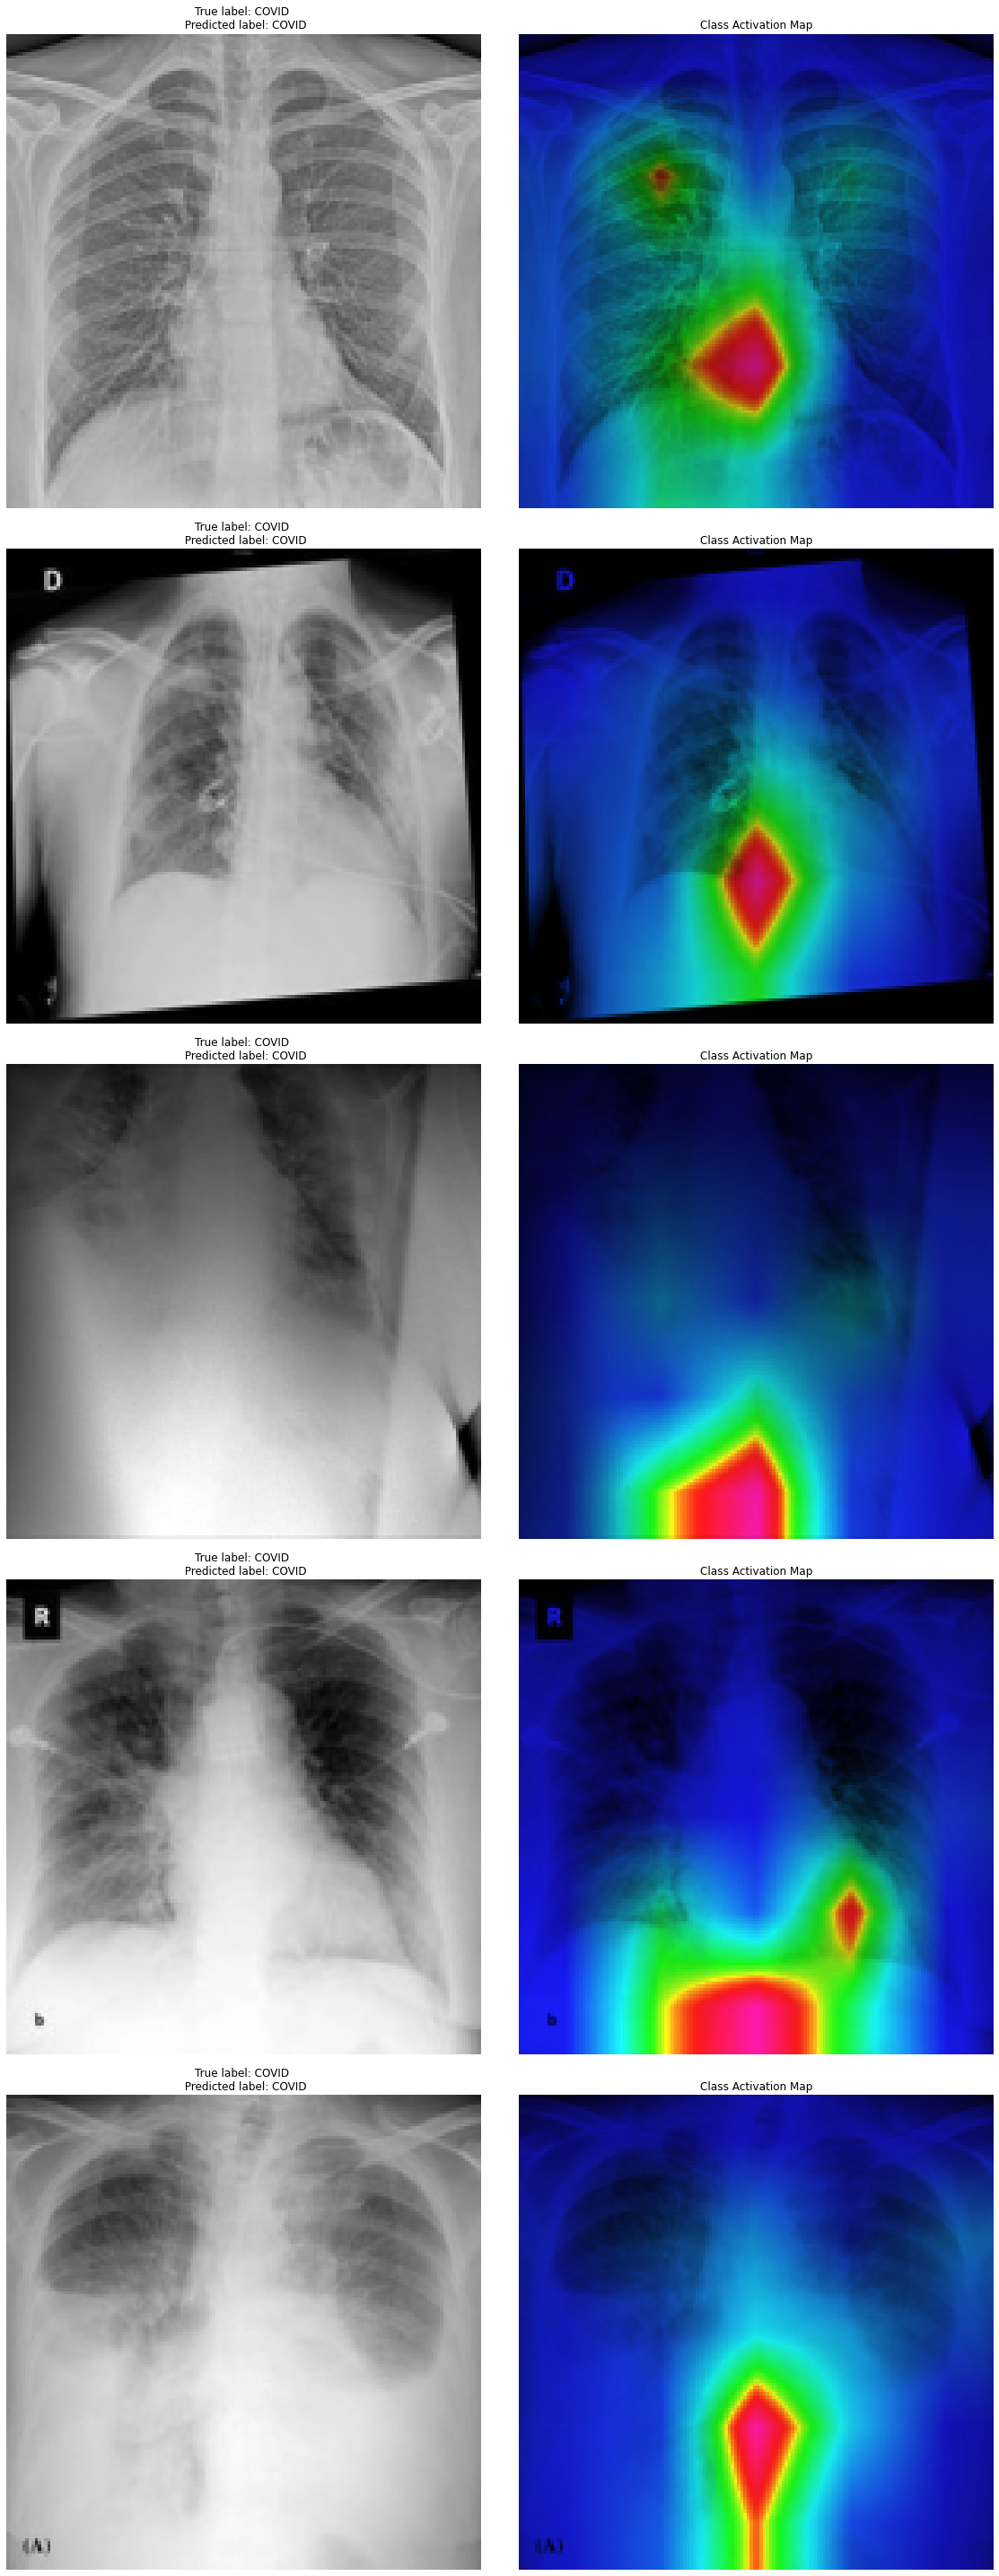

In [10]:
#COVID HEATMAP
img = glob(path_test+dis[2]+"/*.jpg")
random.shuffle(img)
count = 0
f,ax = plt.subplots(num,2, figsize=(16,40))
ax = ax.ravel()
plt.tight_layout()
i = 0
for sample_image in img:
    sample_image = plt.imread(sample_image)
    pred_label,sample_image1,sample_image_processed = pre(sample_image,model)
    img_masked = heatm(pred_label,sample_image1,sample_image_processed)
    if(dis[2] == dis[pred_label]):
        ax[i].imshow(sample_image1)
        ax[i].set_title(f"True label: {dis[2]} \n Predicted label: {dis[pred_label]}")
        ax[i].axis('off')
        i+=1
        ax[i].imshow(img_masked)
        ax[i].set_title("Class Activation Map")
        ax[i].axis('off')
        i+=1
        count += 1
        if(count == num):
            break
plt.show()